# Injection-retrieval Testing

This notebook demonstrates how to perform injection-retrieval testing to characterize `mono-cbp`'s detection efficiency for different transit depths and durations.

## Setup

In [1]:
from mono_cbp import TransitInjector
from mono_cbp.utils import load_transit_models, setup_logging
import matplotlib.pyplot as plt
import os
%matplotlib inline

setup_logging(log_file=None)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<Logger mono_cbp (INFO)>

## Prepare Transit Models

Note: Transit models are pre-generated light curves that contain single-transit profiles for injection. 
See the injection-retrieval module documentation for creating custom transit models.

In [2]:
# For this example, we'll use pre-generated transit models
# You can create a grid of models with different transit depths and durations

transit_models_path = '../catalogues/transit_models.npz'

# Check if models exist
if os.path.exists(transit_models_path):
    models = load_transit_models(transit_models_path)
    print(f"Loaded transit models from {transit_models_path}")
    print(f"Number of models: {models['num_depths'] * models['num_durations']}")
else:
    print(f"Transit models not found at {transit_models_path}")
    print("Please generate transit models first (see documentation)")

Loaded transit models from ../catalogues/transit_models.npz
Number of models: 49


In [3]:
# # This cell is optional - only run if you need to create new transit models
# # Uncomment and modify as needed

# # Example: Create a simple grid of transit models
# from mono_cbp.utils import create_transit_models, save_transit_models

# # Create a grid of transit models
# models = create_transit_models(
#     depth_range=(2e-3, 1e-2),   # 0.2% to 1%
#     duration_range=(0.3, 1.0),   # 0.3 to 1.0 days
#     num_depths=10,
#     num_durations=10
# )

# print(f"Created {len(models['models'])} transit models")
# # Output: Created num_depths * num_durations transit models

# # Save for later use
# save_transit_models(models, '../catalogues/transit_models_test.npz')

# # Access individual models
# for model in models['models']:
#     print(f"Depth: {model['depth']:.4f}, Duration: {model['duration']:.2f} days")

## Initialise `TransitInjector`

In [4]:
injector = TransitInjector(
    transit_models_path='../catalogues/transit_models.npz',
    catalogue='../catalogues/TEBC_morph_05_P_7.csv',
    TEBC=True
)

2025-12-09 03:29:31 - mono_cbp.injection_retrieval - INFO - Loaded 49 transit models from ../catalogues/transit_models.npz
2025-12-09 03:29:31 - mono_cbp.utils.data - INFO - Loaded catalogue with 592 targets from ../catalogues/TEBC_morph_05_P_7.csv


## Run Injection-Retrieval

This will inject synthetic transits into the light curves stored in ../data and attempt to recover them:

In [5]:
data_dir = '../data'
output_dir = 'results'
os.makedirs(output_dir, exist_ok=True)

results = injector.run_injection_retrieval(
    data_dir=data_dir,
    n_injections=2,  # Process 5 injections per model for demo
    output_file='inj-ret_results.csv',
    output_dir=output_dir
)

2025-12-09 03:29:37 - mono_cbp.injection_retrieval - INFO - Starting injection-retrieval tests: 2 injections x 49 models = 98 total tests
2025-12-09 03:29:37 - mono_cbp.injection_retrieval - INFO - Model 1/49: depth=0.0010, duration=0.1000
2025-12-09 03:29:37 - mono_cbp.injection_retrieval - INFO -   Sampling 2 files without replacement from 2 available
2025-12-09 03:29:38 - mono_cbp.utils.detrending - INFO - TIC_260128333_06 cos + biweight
2025-12-09 03:29:38 - mono_cbp.utils.detrending - INFO - Cosine window length: 2.1 days
2025-12-09 03:29:38 - mono_cbp.utils.detrending - INFO - TIC_260128333_07 cos + biweight
2025-12-09 03:29:38 - mono_cbp.utils.detrending - INFO - Cosine window length: 3.7 days
2025-12-09 03:29:39 - mono_cbp.injection_retrieval - INFO -   Model recovery rate: 0.00% (0/2)
2025-12-09 03:29:39 - mono_cbp.injection_retrieval - INFO - Model 2/49: depth=0.0010, duration=0.2500
2025-12-09 03:29:39 - mono_cbp.injection_retrieval - INFO -   Sampling 2 files without replac

## Visualise Results

2025-12-09 03:31:15 - mono_cbp.injection_retrieval - INFO - Saved completeness plot to results/completeness.png


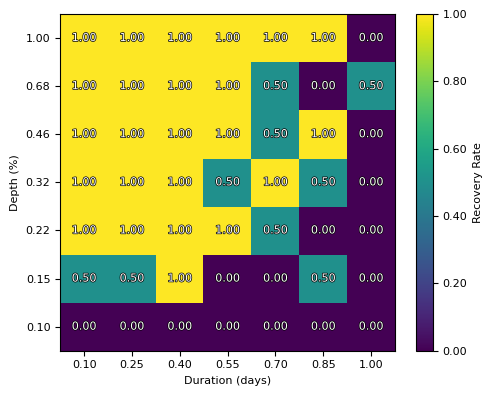

In [6]:
fig = injector.plot_completeness(
    stats_file='results/inj-ret_results_stats.csv',
    figsize=(5, 4),
    save_fig=True,
    output_path='results/completeness.png'
)

plt.show()

Here we can see that the detection efficiency of deeper transits with shorter durations is better than longer duration, shallow transits.

Note that, due to the small number of injection-retrieval tests, the statistics are not reliable in this case. To more accurately determine the detection efficiency, increase `n_injections`.

**Output files:**
- Injection-retrieval results: `results/inj-ret_results.csv`
- Injection-retrieval stats: `results/inj-ret_results_stats.csv`
- Completeness plots: `results/completeness.png`